# Sterbetafel 2023 DE visualisiert

# Datensatz

## Bibliotheken für ETL und DDA

In [4]:
#import libraries
import numpy as np
import pandas as pd
from summarytools import dfSummary

## ETL

Der Datensatz wurde von hier runtergeladen: https://www-genesis.destatis.de/datenbank/online/statistic/12621/table/12621-0001
Überschrift: Sterbetafel (Periodensterbetafel): Deutschland, Jahre, Geschlecht, Vollendetes Alter

Der Datensatz wurde nochmal überarbeitet. 

Rohdaten: <img src="fotos/Screenshot_alter_datensatz.png"></img>

So wurden überflüssige Spalten und Zeilen gelöscht. Die Kopfzeilen wurden zusammengefasst. Die Kommazahlen wurden gemäß englischem Format in Punkte umgewandelt. Die Jahresangaben wurden in floats abgeändert. Die Trennung der Daten wurden durch Kommata ersetzt.

Überarbeitet: <img src="fotos/Screenshot_neuer_datensatz.png"></img>

-> Ein sehr überschaubarer Datensatz. 101 Zeilen, 15 Spalten. Reiner Visualisierungsspielplatz mit makabren Zahlen.

In [5]:
#load the data
df = pd.read_csv('./Sterbetafel_Daten.csv')
df

,Alter in Jahren,Sterbewahrscheinlichkeit [q(x)] männlich Ziffer,Überlebenswahrscheinlichkeit [p(x)] männlich Ziffer,Überlebende [l(x)] männlich Anzahl,Gestorbene [d(x)] männlich Anzahl,Bis zum Alter x+1 durchlebte Jahre [L(x)] männlich Jahre,Insgesamt noch zu durchlebende Jahre [T(x)] männlich Jahre,Durchschnittliche Lebenserwartung [e(x)] männlich Jahre,Sterbewahrscheinlichkeit [q(x)] weiblich Ziffer,Überlebenswahrscheinlichkeit [p(x)] weiblich Ziffer,Überlebende [l(x)] weiblich Anzahl,Gestorbene [d(x)] weiblich Anzahl,Bis zum Alter x+1 durchlebte Jahre [L(x)] weiblich Jahre,Insgesamt noch zu durchlebende Jahre [T(x)] weiblich Jahre,Durchschnittliche Lebenserwartung [e(x)] weiblich Jahre
0,0,0.003253,0.996747,100000,325,99707,7816643,78.17,0.002890,0.997110,100000,289,99743,8299434,82.99
1,1,0.000253,0.999746,99675,25,99662,7716936,77.42,0.000209,0.999791,99711,21,99701,8199691,82.23
2,2,0.000181,0.999819,99649,18,99640,7617274,76.44,0.000153,0.999846,99690,15,99683,8099990,81.25
3,3,0.000141,0.999859,99631,14,99624,7517634,75.45,0.000119,0.999881,99675,12,99669,8000308,80.26
4,4,0.000118,0.999882,99617,12,99611,7418009,74.47,0.000097,0.999903,99663,10,99658,7900639,79.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,0.335826,0.664174,3042,1022,2532,6668,2.19,0.287124,0.712876,7886,2264,6754,19917,2.53
97,97,0.360297,0.639703,2021,728,1657,4137,2.05,0.312156,0.687844,5622,1755,4744,13163,2.34
98,98,0.384674,0.615326,1293,497,1044,2480,1.92,0.337911,0.662089,3867,1307,3214,8419,2.18
99,99,0.408936,0.591064,795,325,633,1436,1.81,0.364503,0.635497,2560,933,2094,5206,2.03


## ~Deskriptive Datenanalyse

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Alter in Jahren                                             101 non-null    int64  
 1   Sterbewahrscheinlichkeit [q(x)] männlich Ziffer             101 non-null    float64
 2   Überlebenswahrscheinlichkeit [p(x)] männlich Ziffer         101 non-null    float64
 3   Überlebende [l(x)] männlich Anzahl                          101 non-null    int64  
 4   Gestorbene [d(x)] männlich Anzahl                           101 non-null    int64  
 5   Bis zum Alter x+1 durchlebte Jahre [L(x)] männlich Jahre    101 non-null    int64  
 6   Insgesamt noch zu durchlebende Jahre [T(x)] männlich Jahre  101 non-null    int64  
 7   Durchschnittliche Lebenserwartung [e(x)] männlich Jahre     101 non-null    float64
 8   

In [7]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Alter in Jahren[int64],Mean (sd) : 50.0 (29.3)min < med < max:0.0 < 50.0 < 100.0IQR (CV) : 50.0 (1.7),101 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB+UlEQVR4nO3XO27CUBBG4bkOIPOQLYQCC0iZjpJFZLFZQgpWQJEmFR0SsoxwsALGaWkAc80jf3S+lkzuFEck48qyNOCvCx69AFBF49EL4P9wzrXNrOU5/lOW5ebYh4SKq3DOtQeDwVsURX2f+dVqlTjn3o/FSqi4llYURf3JZLKJ4zi/ZDBN03A6nfaXy2XLzAgVtxfHcT4cDr89RtunPuSYggRChYSzf/prXnKBme09Z+vOq76tune03++bnrNnnQy1ziVXFEUzy7KXXq/3FQTB9p7zqm+r7m1mtt1uw6IoXvM8/zAzn/9RTzr3jep9yc3n8/5sNnsej8efo9EouXSxOvOqb6vufTDf2e12T5fOVlHp6ve55JIkaZuZdbtdryuwzrzq26p7H87fCscUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDSq/FCapuGlv3i9XodmZlmWhYvFonPPedW3VfeuO1+lr197lEL3u2WDTwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Sterbewahrscheinlichkeit [q(x)] männlich Ziffer[float64],Mean (sd) : 0.1 (0.1)min < med < max:0.0 < 0.0 < 0.4IQR (CV) : 0.0 (0.5),101 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoElEQVR4nO3XsW/aQBiG8e+A0COADUlDNpYOSKnUgZGlW8f+sVm7kzlphi4MVZYoCgqmOFAsx12iLpVCOJcmr/r8Zr6zhZ6zz64oCgNeu8pL3wDwHLVNP3DONcysHrj+uiiKZeAs8NuToTrnGoeHh5+jKOqGLD6fz++cc6fEirI2PVHrURR1R6PRMo7j1TYLJ0nix+Nxdzqd1s2MUFHKxle/mVkcx6ter3cfsH4jYAb4Ax9TkECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokECokFDb5eJ5nu+ZWeScC11iXRTF8i/eEkTtLNQ0TfeyLPvQ7/er1Wp1FbLGfD6/c86dEit2Fup6va557/eHw+Hq+Pj4btv5JEn8eDzuTqfTupkR6n9up69+M7Nms7nq9Xr3IbN5nkcWfnSomNlDyOAjjh2vyM5DDVXm6JDn+V6apu9ardakUqlkIdefzWYL59wXMws5tgRH7pxrmFk9ZPZRmQ1adnOXmX/yP3u1oZY5OlxdXXUvLy+PhsPht5Bjx/X1dfvs7Oxjv99/G3K+LhG5Pzg4+BTHcXPba5qV26BlN3fZ+U3fI88KNUkSv+2FF4uFNzNL09Tf3Nzsh86/hCzLat77/cFg4Dqdzs9tZmezWev8/Dwo8izLvJm9Pzk5+dput39sddNmdnt76yeTydFgMPje6XQW/2q27PxyuXxzcXHx5PfILz4+796FGOC+AAAAAElFTkSuQmCC"">",0(0.0%)
3,Überlebenswahrscheinlichkeit [p(x)] männlich Ziffer[float64],Mean (sd) : 0.9 (0.1)min < med < max:0.6 < 1.0 < 1.0IQR (CV) : 0.0 (9.4),101 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8ekN5oAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnklEQVR4nO3XvU/bQBjH8ecSiGwa7jAJYWPpgAQSAxJLlm4d+WO7duvA0A2VoUuGig2B8tKEpATbHaBVF15sJwq/6vtZnSd3On3lS1ye5wa8dbVVbwB4jbVVbwD/D+dcbGaNkuN3eZ5Pn3pIqFgI51zcarVOvfdJmfnRaNR3zn16KlZCxaI0vPdJt9udhhBmRQaHw2F0dnaW3NzcNMyMULF8IYRZp9O5LTEaP/eQP1OQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQsLbqDeDtcM7FZtYoOe6zLFtf5H7+Ragws4dIW63Wqfc+KTM/n8+jNE0PZ7PZFzO7XfD2CBV/Nbz3SbfbnYYQZkWHLy8vk4uLi437+/v6MjZHqG9MxevX7OF/R1ZizmdZth5C6Hc6ncJvxH6/H5dY89VeDLXiwZU9tEXMV137Ls/zaZnBCmcWbW9vfwwhvCuzbpqm65PJ5H2z2ezVarV5kdllX91VPRtqld8tVQ6t6nzVtc3MBoPB2Dn32cyKXoOlY5vP55GZHZ6cnHxtt9ujovOP1+/O8fHx993d3X6J2aVd3VW99EZteO+To6Mji+P4V5Evvr6+jnq93s7+/v6Pra2tcdGNVZmvuvZgMGien59/2Nvba9fr9UKh/ont4ODg2+bm5s8is4/73kjTdGWxTCaT6OrqaqPo3Hg8jsrOD4fD6KXP/Abi3tOyc5uFTQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Überlebende [l(x)] männlich Anzahl[int64],Mean (sd) : 77883.2 (31740.6)min < med < max:470.0 < 96093.0 < 100000.0IQR (CV) : 32044.0 (2.5),101 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuNCwgaHR

# EDA

## Bibliotheken für EDA

In [8]:
# Visual Python: Visualization > Plotly
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Sterbewahrscheinlichkeit jedes Jahr
### männlich

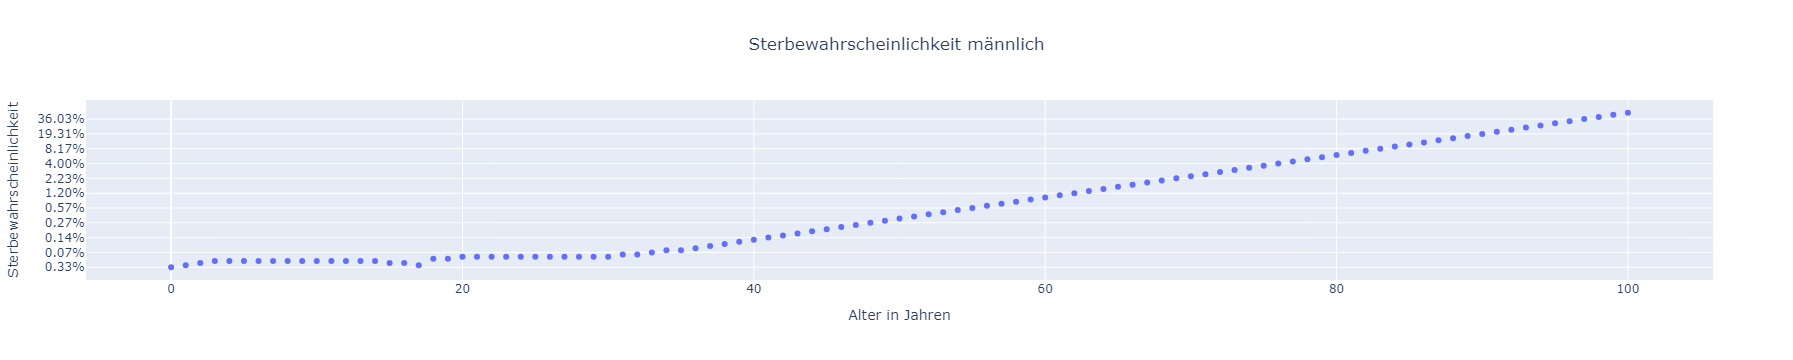

In [9]:
# Daten der y-Achse mit 100 multiplizieren und als Prozent formatieren
df['Sterbewahrscheinlichkeit'] = df['Sterbewahrscheinlichkeit [q(x)] männlich Ziffer'] * 100
df['Sterbewahrscheinlichkeit'] = df['Sterbewahrscheinlichkeit'].map('{:.2f}%'.format)

# Plot erstellen
fig = px.scatter(df, 
                 x='Alter in Jahren', 
                 y='Sterbewahrscheinlichkeit', 
                 title='Sterbewahrscheinlichkeit männlich')

fig.update_layout(title_x=0.5)

fig.show()

### beide Geschlechter

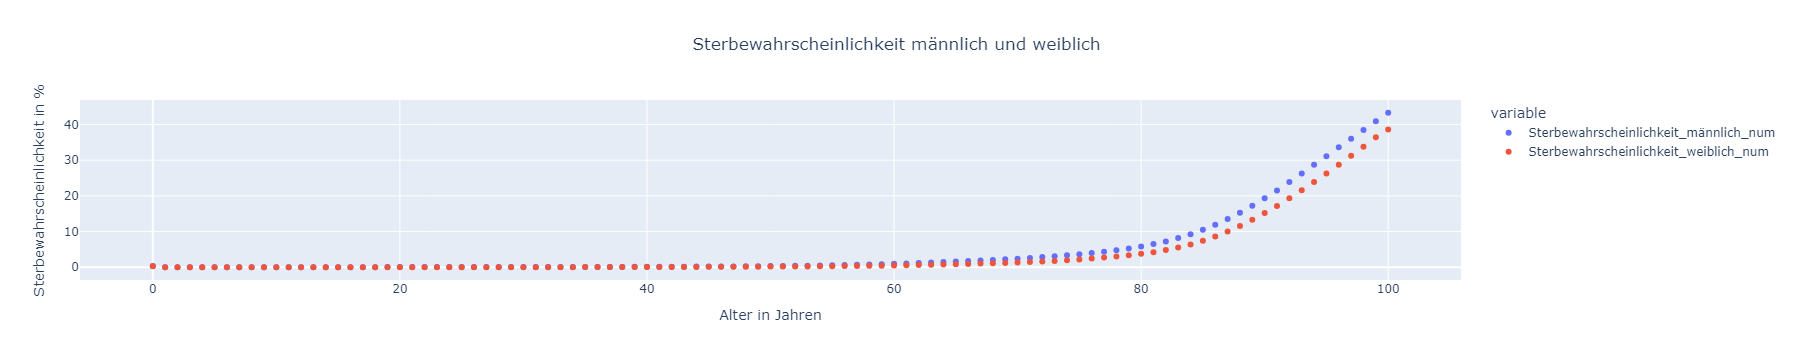

In [20]:
# Daten der y-Achse mit 100 multiplizieren und als Prozent formatieren
# Numerische Werte für den Plot
df['Sterbewahrscheinlichkeit_männlich_num'] = df['Sterbewahrscheinlichkeit [q(x)] männlich Ziffer'] * 100
df['Sterbewahrscheinlichkeit_weiblich_num'] = df['Sterbewahrscheinlichkeit [q(x)] weiblich Ziffer'] * 100

# Formatierte Werte für die Anzeige
df['Sterbewahrscheinlichkeit_männlich'] = df['Sterbewahrscheinlichkeit_männlich_num'].map('{:.2f}%'.format)
df['Sterbewahrscheinlichkeit_weiblich'] = df['Sterbewahrscheinlichkeit_weiblich_num'].map('{:.2f}%'.format)

# Plot erstellen
fig = px.scatter(df,
                 x='Alter in Jahren',
                 y=['Sterbewahrscheinlichkeit_männlich_num', 'Sterbewahrscheinlichkeit_weiblich_num'],
                 title='Sterbewahrscheinlichkeit männlich und weiblich')

fig.update_layout(
    title_x=0.5,
    yaxis_title="Sterbewahrscheinlichkeit in %"
)

fig.show()

### beide Geschlechter, logarithmische Skala

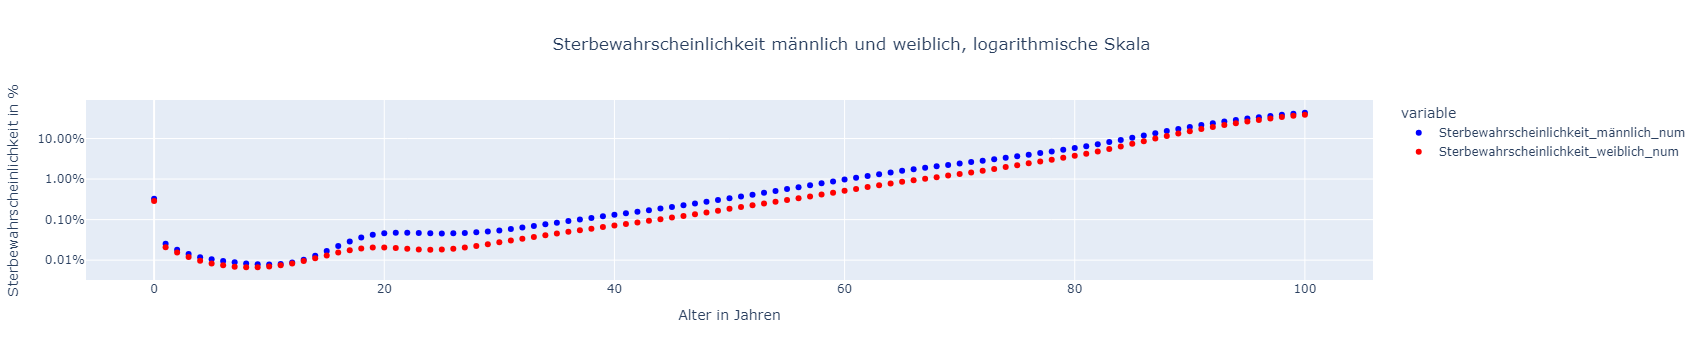

In [23]:
# Daten der y-Achse mit 100 multiplizieren und als Prozent formatieren
# Numerische Werte für den Plot
df['Sterbewahrscheinlichkeit_männlich_num'] = df['Sterbewahrscheinlichkeit [q(x)] männlich Ziffer']
df['Sterbewahrscheinlichkeit_weiblich_num'] = df['Sterbewahrscheinlichkeit [q(x)] weiblich Ziffer']

# Formatierte Werte für die Anzeige
df['Sterbewahrscheinlichkeit_männlich'] = df['Sterbewahrscheinlichkeit_männlich_num'].map('{:.2f}%'.format)
df['Sterbewahrscheinlichkeit_weiblich'] = df['Sterbewahrscheinlichkeit_weiblich_num'].map('{:.2f}%'.format)

# Plot erstellen
fig = px.scatter(df,
                 x='Alter in Jahren',
                 y=['Sterbewahrscheinlichkeit_männlich_num', 'Sterbewahrscheinlichkeit_weiblich_num'],
                 title='Sterbewahrscheinlichkeit männlich und weiblich, logarithmische Skala',
                 color_discrete_map={'Sterbewahrscheinlichkeit_männlich_num': 'blue', 'Sterbewahrscheinlichkeit_weiblich_num': 'red'},
                 log_y=True  # Hier wird die logarithmische Skala aktiviert
)

fig.update_layout(
    title_x=0.5,
    xaxis_title="Alter in Jahren",
    yaxis_title="Sterbewahrscheinlichkeit in %",
    yaxis_tickformat='.2%'
)

fig.show()

## Überlebenswahrscheinlichkeit
### männlich